# Interro de mi-semestre -- Science des données

In [44]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Minimisation du risque empirique

Soit un ensemble de points $S = \{ (0.1, 0.7), (0.3, 0.6), (0.6, 0.8), (0.8, 0.9), (0.3, 0.1), (0.35, 0.2), (0.6, 0.4), (0.9, 0.2) \}$ et d'étiquettes $y = \{ 1, 1, 1, 1, 0, 0, 0, 0 \}$.

**Question 1.1.** <span style='color:blue'>(1 point)</span> Tracez cet ensemble de points, en affichant en rouge les points dont l'étiquette est $1$ et en bleu ceux dont l'étiquette est $0$.

*Aide* L'attribut `color` permet d'associer des couleurs à chaque point. C'est un vecteur de valeurs soit `"red"` ou `"blue"` de taille égale au nombre de points à dessiner. 

    ["red" if e == 1 else "blue" for e in y]

In [45]:
S = np.array(((0.1,0.7),(0.3,0.6),(0.6,0.8),(0.8,0.9),(0.3,0.1),(0.35,0.2),(0.6,0.4),(0.9,0.2)))
S

array([[0.1 , 0.7 ],
       [0.3 , 0.6 ],
       [0.6 , 0.8 ],
       [0.8 , 0.9 ],
       [0.3 , 0.1 ],
       [0.35, 0.2 ],
       [0.6 , 0.4 ],
       [0.9 , 0.2 ]])

In [46]:
y = np.array((1,1,1,1,0,0,0,0))
y

array([1, 1, 1, 1, 0, 0, 0, 0])

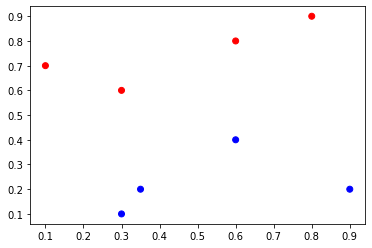

In [47]:
plt.scatter(S[:,0], S[:,1], color=["red" if e == 1 else "blue" for e in y])
plt.show()

**Question 1.2.** <span style='color:blue'>(1 point)</span> 

Donnez l'erreur empirique faite par la fonction qui associe $1$ aux points au dessus de la droite horizontale passant par le point $(0, 0.5)$ et $0$ à ceux en dessous.


De même pour la fonction qui associe $1$ aux points à gauche de la droite verticale passant par le point $(0.5, 0)$ et $0$ à ceux à sa droite.

*Réponse* : $L_S(h:x\mapsto 0.5)=0$ et $L_S(h:y\mapsto 0.5)=\frac{4}{8}=\frac{1}{2}$


**Question 1.3.**  <span style='color:blue'>(1 point)</span> Supposons que les points de $S$ aient été tirés uniformément dans l'ensemble $[0, 1] \times [0, 1]$, et que la fonction cible soit la fonction qui associe $1$ aux points au dessus de la droite passant par les points $(0,0)$ et $(1, 1)$ et $0$ à ceux en dessous.

Reprenez le dessin ci-dessus et tracez cette droite par dessus.

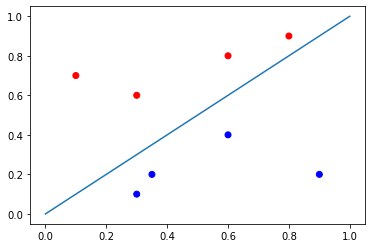

In [48]:
plt.scatter(S[:,0], S[:,1], color=["red" if e == 1 else "blue" for e in y])
plt.plot([0,1], [0,1])
plt.show()

**Question 1.4.**  <span style='color:blue'>(1 point)</span> 

- Quelle est l'erreur réelle comise par lla fonction qui associe $1$ aux points au dessus de la droite horizontale passant par le point $(0, 0.5)$ et $0$ à ceux en dessous ? 

- Que peut-on dire de la performance de notre modèle sur de nouvelles données ?

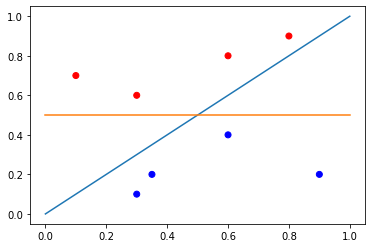

In [49]:
plt.scatter(S[:,0], S[:,1], color=["red" if e == 1 else "blue" for e in y])
plt.plot([0,1], [0,1])
plt.plot([0,1],[0.5,0.5])
plt.show()

*Réponse* : $L_{D,f}(h:x\mapsto 0.5) = 2\times\frac{0.5\times 0.5}{2}= \frac{1}{4}$.

La perfomance du modèle est donc de 75%

**Question 1.5.**  <span style='color:blue'>(1 point)</span> Que faudrait-il pour réduire l'erreur réelle du modèle appris par minimisation du risque empirique ?

*Réponse* : Il faut augmenter le augmenter le nombre de points

## 2 - Régression avec une erreur

On considère l'échantillon de points $(X, y)$ suivant :

In [50]:
rng = np.random.RandomState(42)

X = np.array([-2, -6, 3, 7, 5, 0, 4])
y = X*3 - 2 + np.random.normal(0, 2, len(X))
X = X[:, np.newaxis]

Mais une erreur de mesure a créé un point aberrant (celui d'indice 0).

In [51]:
yout = y.copy()
yout[0] = 30

**Question 2.1.**  <span style='color:blue'>(2 points)</span> Créer un modèle de régression linéaire sur l'échantillon $(X, yout)$, tracer le nuage de points $(X, yout)$  et la droite de régression. 

In [52]:
import sklearn.linear_model as lm

In [99]:
reg = lm.LinearRegression()
reg.fit(X, yout)

LinearRegression()

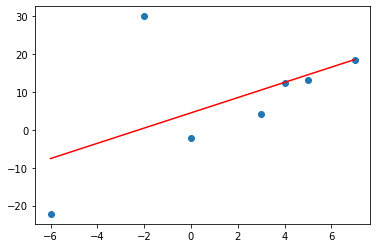

In [54]:
plt.scatter(X, yout)
x = np.linspace(-6, 7, 100)[:,np.newaxis]
plt.plot(x, reg.predict(x), color="red")
plt.show()

**Question 2.2.**  <span style='color:blue'>(1 point)</span> Que s'est-il passé? 

*Réponse* : On a un effet levier

**Question 2.3.**  <span style='color:blue'>(2 points)</span> Importez les fonctions [mean_absolute_error ou MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) et [mean_squared_error ou MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Considérons la fonction de prédiction $f(x)=3x-2$ qui prédit la valeur $y_x = f(x)$ sur le point $x$. 

Calculez les erreurs MAE et MSE entre les valeurs prédites et les valeurs réelles (étiquettes) pour les configurations suivantes : 
1. sur les points de données [-6, 3, 7, 5, 0, 4] étiquetés par $y$ ;
2. sur les points de données [-2, -6, 3, 7, 5, 0, 4] étiquetés par $y$ ;
3. sur les points de données [-2, -6, 3, 7, 5, 0, 4] étiquetés par $yout$.

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
def f(x):
    return 3*x-2

In [57]:
y_1 = f(np.array([-6, 3, 7, 5, 0, 4]))
y_2 = f(np.array([-2, -6, 3, 7, 5, 0, 4]))
y_1, y_2

(array([-20,   7,  19,  13,  -2,  10]),
 array([ -8, -20,   7,  19,  13,  -2,  10]))

In [58]:
print("mean_absolute_error")
#mean_absolute_error(y_true=y, y_pred=y_1) # Il y a une erreur de dimension
print("contre y :", mean_absolute_error(y_true=y, y_pred=y_2))
print("contre yout :", mean_absolute_error(y_true=yout, y_pred=y_2))

mean_absolute_error
contre y : 1.2412040213438853
contre yout : 6.641814300027008


In [59]:
print("mean_squared_error")
#mean_square_error(y_true=y, y_pred=y_1) # Il y a une erreur de dimension
print("contre y :", mean_squared_error(y_true=y, y_pred=y_2))
print("contre yout :", mean_squared_error(y_true=yout, y_pred=y_2))

mean_squared_error
contre y : 2.879442559208848
contre yout : 209.1596840636016


**Question 2.4.**  <span style='color:blue'>(1 point)</span> Quelle est la mesure d'erreur qui est la plus sensible à ce point aberrant ? A quoi cela est-il dû ?

*Réponse* : `mean_square_error` est très sensible car l'erreur à été amplifier par l'élévation au carré

##### **Question 2.5.**  <span style='color:blue'>(1 point)</span> 
Quelles sont les dérivées partielles de la fonction d'erreur `mean_absolute_error` pour un seul exemple $\mathbf x=(x_1,\dots, x_d)$ étiqueté par $y$ quand les paramètres du modèle linéaire sont $\mathbf w = (w_1,\dots, w_d)$ ? 

*Aide :* Vous pouvez étudier deux cas : le cas où $\mathbf w^\top\mathbf x-y$ est positif et celui où c'est négatif.

*Réponse* : On pose $f(x, y, w) = \cfrac{1}{d}\displaystyle\sum_{i=1}^d \vert w_ix_i-y_i\vert$

$\begin{align}
\partial_w f(x,y,w) &= \cfrac{1}{d}\partial_{w_i} \displaystyle\sum_{i=1}^d \vert w_ix_i-y_i \vert \\
&= \cfrac{1}{d}\displaystyle\sum_{i=1}^d \partial_{w_i} \vert w_ix_i-y_i \vert \\
&= \cfrac{1}{d}\displaystyle\sum_{i=1}^d sgn(w_ix_i-y_i)\times \partial_{w_i} (w_ix_i-y_i),\; \text{ car } \frac{d|x|}{dx}=sgn(x) \\
&= \cfrac{1}{d}\displaystyle\sum_{i=1}^d sgn(w_ix_i-y_i)\times x_i \\
\end{align}$

**Rappel.** On rappelle l'algorithme simple de descente de gradient

In [60]:
def regr(X, y, eta=0.00005, n_iter=100, fit_intercept=True):
    """A chaque itération, tous les exemples sont passés"""
    
    if fit_intercept:
        XX = np.concatenate([X,np.ones((X.shape[0],1))],axis=1)
    else:
        XX = X

    w_trans = rng.rand(XX.shape[1])
    for i in range(n_iter):
        # calcul du gradient
        E = w_trans@XX.T - y    # erreur (vecteur)
        G = 2*XX*E[:,np.newaxis]  # Gradient (matrice)
        
        # modification des poids
        w_trans -= eta*np.sum(G, axis=0)  # Descente selon le gradient
        
    return w_trans

**Question 2.6.**  <span style='color:blue'>(1 point)</span> Modifiez cet algorithme pour optimiser la MAE plutôt que la MSE. 

*Aide :* `np.sign` appliqué à un vecteur retourne un vecteur de -1 ou +1 selon le signe de la composante.  

In [149]:
def regrMSE(X, y, eta=0.00005, n_iter=100, fit_intercept=True):
    """A chaque itération, tous les exemples sont passés"""
    
    if fit_intercept:
        XX = np.concatenate([X,np.ones((X.shape[0],1))],axis=1)
    else:
        XX = X
        
    d = np.max(y.shape)
    w_trans = rng.rand(XX.shape[1])[:,np.newaxis]
    for i in range(n_iter):
        # calcul du gradient
        sgn = np.sign(XX@w_trans-y)
        G = 1/d*np.sum(sgn*XX)
        
        # modification des poids
        w_trans -= eta*G  # Descente selon le gradient
        
    return w_trans

**Question 2.7.**  <span style='color:blue'>(1 point)</span> Calculez le résultat en prenant un pas de gradient de 0.001 et 5000 itérations. 

In [159]:
coef = regrMSE(X, yout[:,np.newaxis], eta=0.001, n_iter=5000)
coef

array([[2.26870577],
       [2.47839575]])

**Question 2.8.**  <span style='color:blue'>(1 point)</span> Tracez la droite obtenue sur le nuage de points et interprétez le résultat. 

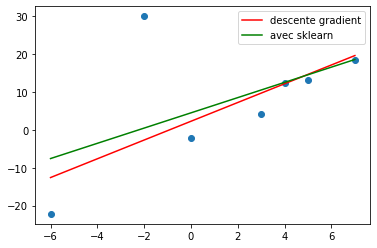

In [160]:
plt.scatter(X, yout)
plt.plot(x, coef[0]+coef[1]*x, color="red", label="descente gradient")
plt.plot(x, reg.predict(x), color="green", label="avec sklearn")
plt.legend()
plt.show()

*Réponse interprétation* : 

**Information.** Le problème avec cette approche est quand on se rapproche du minimum, le gradient peut être un peu brutal et donc on peut avoir des problèmes de convergence. Une fonction de perte un peu plus élaborée fait en sorte que lorsque on est proche de la solution ($\mathbf X\mathbf w-\mathbf y$ est sous un certain seuil $\epsilon$) alors la fonction de perte n'est plus linéaire (la MAE) mais une fonction quadratique (comme une MSE). C'est la fonction de perte de Huber.   

**Question 2.9.**  <span style='color:blue'>(1 point)</span> importez [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html) et entraînez-le sur X avec les étiquettes $yout$ et tracez le nuage de points avec les deux droites 
- la régression linéaire en noir ; 
- la régression huber en vert.

In [134]:
from sklearn.linear_model import HuberRegressor
HuberRegressor?

In [161]:
hreg = HuberRegressor()
hreg.fit(X, yout)

HuberRegressor()

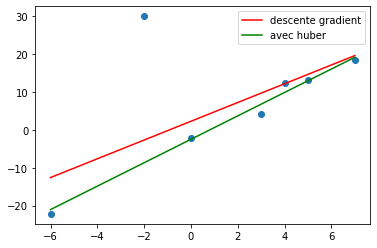

In [163]:
plt.scatter(X, yout)
plt.plot(x, coef[0]+coef[1]*x, color="red", label="descente gradient")
plt.plot(x, hreg.predict(x), color="green", label="avec huber")
plt.legend()
plt.show()

# 3 - Régression presque linéaire

In [ ]:
rng = np.random.default_rng(seed=42)

X = np.linspace(-5, 10, 100)

y = 10 * X ** 2 - X ** 3 + rng.normal(scale=50, size=100)
X = X[:, np.newaxis]

In [ ]:
plt.scatter(X, y)

**Question 3.1.**  <span style='color:blue'>(2 points)</span> Utilisez `scikit-learn` pour apprendre une régression linéaire sur ce jeu de données et affichez le score obtenu. Que dire du résultat ? Est-ce que disposer de plus grands échantillon va permettre de baisser l'erreur réelle ?

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3/5)
reg = lm.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.06535103975173151

*Interprétation du résultat* : 

**Question 3.2.**  <span style='color:blue'>(1 point)</span> Tracez la courbe de notre régression linéaire.

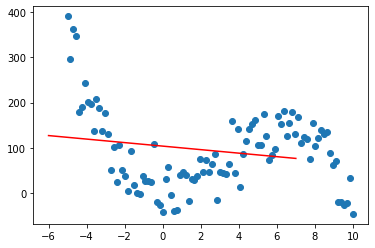

In [25]:
plt.scatter(X, y)
plt.plot(x, reg.predict(x), color="red")

**Question 3.3.**  <span style='color:blue'>(1 point)</span> Définissez `Xadd` contenant trois attributs : $X$,  $X^2$ et $X^3$. 

In [26]:
Xadd = X
for k in [2,3]:
    Xadd = np.concatenate([Xadd, X**k], axis=1)
Xadd[:5,:]

array([[  -5.        ,   25.        , -125.        ],
       [  -4.84848485,   23.50780533, -113.97723794],
       [  -4.6969697 ,   22.06152433, -103.62231127],
       [  -4.54545455,   20.66115702,  -93.91435011],
       [  -4.39393939,   19.3067034 ,  -84.83248463]])

**Question 3.4.**  <span style='color:blue'>(1 point)</span> Réentrainez la régression linéaire avec `Xadd` et `y`. Tracez la courbe. Que dire du score obtenu ? 

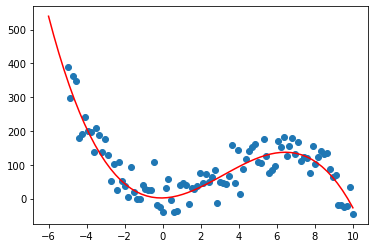

In [34]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xadd, y, train_size=3/5)
reg = lm.LinearRegression()
reg.fit(Xd_train, yd_train)
reg.score(Xd_test, yd_test)

x = np.linspace(-6, 10, 60).reshape(60,1)
xx = x
for k in [2,3]:
    xx = np.concatenate([xx, x**k], axis=1)
plt.scatter(X, y)
plt.plot(x, reg.predict(xx), color="red")

*Interprétation* : 

###### **Question 3.5.**  <span style='color:blue'>(1 point)</span> Que se passerait-il si l'on rajoutait les colonnes $X^k$ pour $k$ allant de $1$ à $25$ ?

*Réponse :* 

**Question 3.6.**  <span style='color:blue'>(1 point)</span> Supposons que l'on a découpé $X$ en un ensemble d'entraînement $X_{train}$ et un ensemble de test $X_{test}$. Comment pourrions-nous utiliser ces ensembles pour choisir la bonne valeur de $k$ ?

*Réponse :* 

**Question 3.7.**  <span style='color:blue'>(1 point)</span> Quel est le rôle de l'ensemble $X_{test}$ dans la méthode décrite à la question précédente ?

*Réponse :* 